In [2]:
pip install transformers datasets torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

## Data Exploration, Cleaning, and Preprocessing

#Analyze the Structure and Content of the Dataset:

In [3]:
from datasets import load_dataset

# Load the dataset
dataset = load_dataset("toughdata/quora-question-answer-dataset")

# Explore the dataset
print(dataset)
print(dataset['train'][2])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/56402 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['question', 'answer'],
        num_rows: 56402
    })
})
{'question': 'What song has the lyrics "someone left the cake out in the rain"?', 'answer': "MacArthur's Park\n"}


#Remove Irrelevant Information:

In [48]:
# Remove unnecessary columns
#dataset = dataset.remove_columns(['id', 'category'])

# There is no any irrelevant information or columns in dataset.

#Tokenization, Stop Word Removal, and Stemming/Lemmatisation:

In [4]:
from datasets import load_dataset
from transformers import BertTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download stopwords and lemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Initialize the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Load the dataset
dataset = load_dataset("toughdata/quora-question-answer-dataset")

def preprocess_text(text):
    # Tokenize text into words
    words = text.split()
    # Remove stop words and apply lemmatization
    cleaned_text = " ".join([lemmatizer.lemmatize(word) for word in words if word.lower() not in stop_words])
    return cleaned_text

def preprocess_data(examples):
    # Apply text preprocessing to each question
    preprocessed_questions = [preprocess_text(question) for question in examples['question']]
    # Tokenize the preprocessed text
    tokens = tokenizer(preprocessed_questions, truncation=True, padding='max_length', max_length=128)
    return tokens

# Apply the preprocessing
encoded_dataset = dataset.map(preprocess_data, batched=True)

# Show an example of the preprocessed and tokenized data
print(encoded_dataset['train'][2])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Map:   0%|          | 0/56402 [00:00<?, ? examples/s]

{'question': 'What song has the lyrics "someone left the cake out in the rain"?', 'answer': "MacArthur's Park\n", 'input_ids': [101, 2299, 13677, 1000, 2619, 2187, 9850, 4542, 1000, 1029, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [50]:
from datasets import load_dataset, DatasetDict

# Create a train-validation split
train_test_split = encoded_dataset['train'].train_test_split(test_size=0.2)
encoded_dataset = DatasetDict({
    'train': train_test_split['train'],
    'test': train_test_split['test']
    })

In [51]:
# Set the format for PyTorch
#encoded_dataset.set_format(type='torch', columns=['input_ids', 'token_type_ids', 'attention_mask' ,'question', 'answer'])
encoded_dataset.set_format(type='torch')

##Model Selection and Evaluation

In [52]:
!pip install rouge_score datasets
!pip install scikit-learn

from transformers import BertTokenizer, BertForQuestionAnswering, T5Tokenizer, T5ForConditionalGeneration, GPT2Tokenizer, GPT2LMHeadModel
import torch
from datasets import load_metric

# Load metrics
rouge = load_metric('rouge')
bleu = load_metric('bleu')

# Initialize tokenizers and models
bert_tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')
bert_model = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

t5_tokenizer = T5Tokenizer.from_pretrained('t5-small')
t5_model = T5ForConditionalGeneration.from_pretrained('t5-small')

gpt2_tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
gpt2_model = GPT2LMHeadModel.from_pretrained('gpt2')

# Example data (replace with actual data)
questions = ["What is the capital of France?", "How many states are in the USA?"]
contexts = ["The capital of France is Paris.", "The United States of America is composed of 50 states."]
answers = ["Paris", "50"]

# Function to evaluate models
def evaluate_model(model, tokenizer, questions, contexts, answers, model_type='bert'):
    model.eval()
    predictions = []
    references = answers

    for question, context in zip(questions, contexts):
        if model_type == 'bert':
            inputs = tokenizer(question, context, return_tensors='pt')
            with torch.no_grad():
                outputs = model(**inputs)
            answer_start_scores, answer_end_scores = outputs.start_logits, outputs.end_logits
            answer_start = torch.argmax(answer_start_scores)
            answer_end = torch.argmax(answer_end_scores) + 1
            pred_answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(inputs['input_ids'][0][answer_start:answer_end]))
        elif model_type == 't5':
            input_text = f"question: {question} context: {context}"
            inputs = tokenizer(input_text, return_tensors='pt')
            with torch.no_grad():
                outputs = model.generate(inputs['input_ids'], max_new_tokens=50)
            pred_answer = tokenizer.decode(outputs[0], skip_special_tokens=True)
        elif model_type == 'gpt2':
            inputs = tokenizer.encode(question + " " + context, return_tensors='pt')
            with torch.no_grad():
                outputs = model.generate(inputs, max_length=50, pad_token_id=tokenizer.eos_token_id)
            pred_answer = tokenizer.decode(outputs[0], skip_special_tokens=True)

        predictions.append(pred_answer)

    # Tokenize predictions and references for BLEU
    predictions_tokenized = [pred.split() for pred in predictions]
    references_tokenized = [[ref.split()] for ref in references]

    # Calculate metrics
    rouge_score = rouge.compute(predictions=predictions, references=references)
    bleu_score = bleu.compute(predictions=predictions_tokenized, references=references_tokenized)

    # Manually calculate F1 score
    def compute_f1(predictions, references):
        precisions = []
        recalls = []
        f1s = []
        for pred, ref in zip(predictions, references):
            pred_set = set(pred.split())
            ref_set = set(ref.split())
            common = pred_set & ref_set
            if len(pred_set) > 0 and len(ref_set) > 0:
                precision = len(common) / len(pred_set)
                recall = len(common) / len(ref_set)
                if precision + recall > 0:
                    f1 = 2 * (precision * recall) / (precision + recall)
                else:
                    f1 = 0
                precisions.append(precision)
                recalls.append(recall)
                f1s.append(f1)
        return {
            "precision": sum(precisions) / len(precisions),
            "recall": sum(recalls) / len(recalls),
            "f1": sum(f1s) / len(f1s)
        }

    f1_score = compute_f1(predictions, references)

    return rouge_score, bleu_score, f1_score

# Evaluate BERT
bert_scores = evaluate_model(bert_model, bert_tokenizer, questions, contexts, answers, 'bert')
print("BERT Scores:", bert_scores)

# Evaluate T5
t5_scores = evaluate_model(t5_model, t5_tokenizer, questions, contexts, answers, 't5')
print("T5 Scores:", t5_scores)

# Evaluate GPT-2
gpt2_scores = evaluate_model(gpt2_model, gpt2_tokenizer, questions, contexts, answers, 'gpt2')
print("GPT-2 Scores:", gpt2_scores)


Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


BERT Scores: ({'rouge1': AggregateScore(low=Score(precision=1.0, recall=1.0, fmeasure=1.0), mid=Score(precision=1.0, recall=1.0, fmeasure=1.0), high=Score(precision=1.0, recall=1.0, fmeasure=1.0)), 'rouge2': AggregateScore(low=Score(precision=0.0, recall=0.0, fmeasure=0.0), mid=Score(precision=0.0, recall=0.0, fmeasure=0.0), high=Score(precision=0.0, recall=0.0, fmeasure=0.0)), 'rougeL': AggregateScore(low=Score(precision=1.0, recall=1.0, fmeasure=1.0), mid=Score(precision=1.0, recall=1.0, fmeasure=1.0), high=Score(precision=1.0, recall=1.0, fmeasure=1.0)), 'rougeLsum': AggregateScore(low=Score(precision=1.0, recall=1.0, fmeasure=1.0), mid=Score(precision=1.0, recall=1.0, fmeasure=1.0), high=Score(precision=1.0, recall=1.0, fmeasure=1.0))}, {'bleu': 0.0, 'precisions': [0.5, 0.0, 0.0, 0.0], 'brevity_penalty': 1.0, 'length_ratio': 1.0, 'translation_length': 2, 'reference_length': 2}, {'precision': 0.5, 'recall': 0.5, 'f1': 0.5})
T5 Scores: ({'rouge1': AggregateScore(low=Score(precision=1

## Visualization

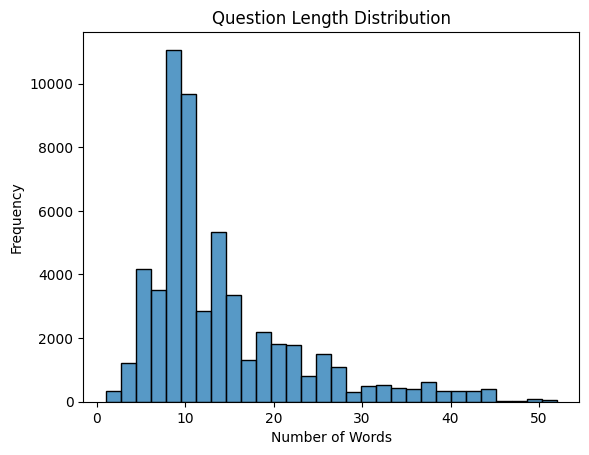

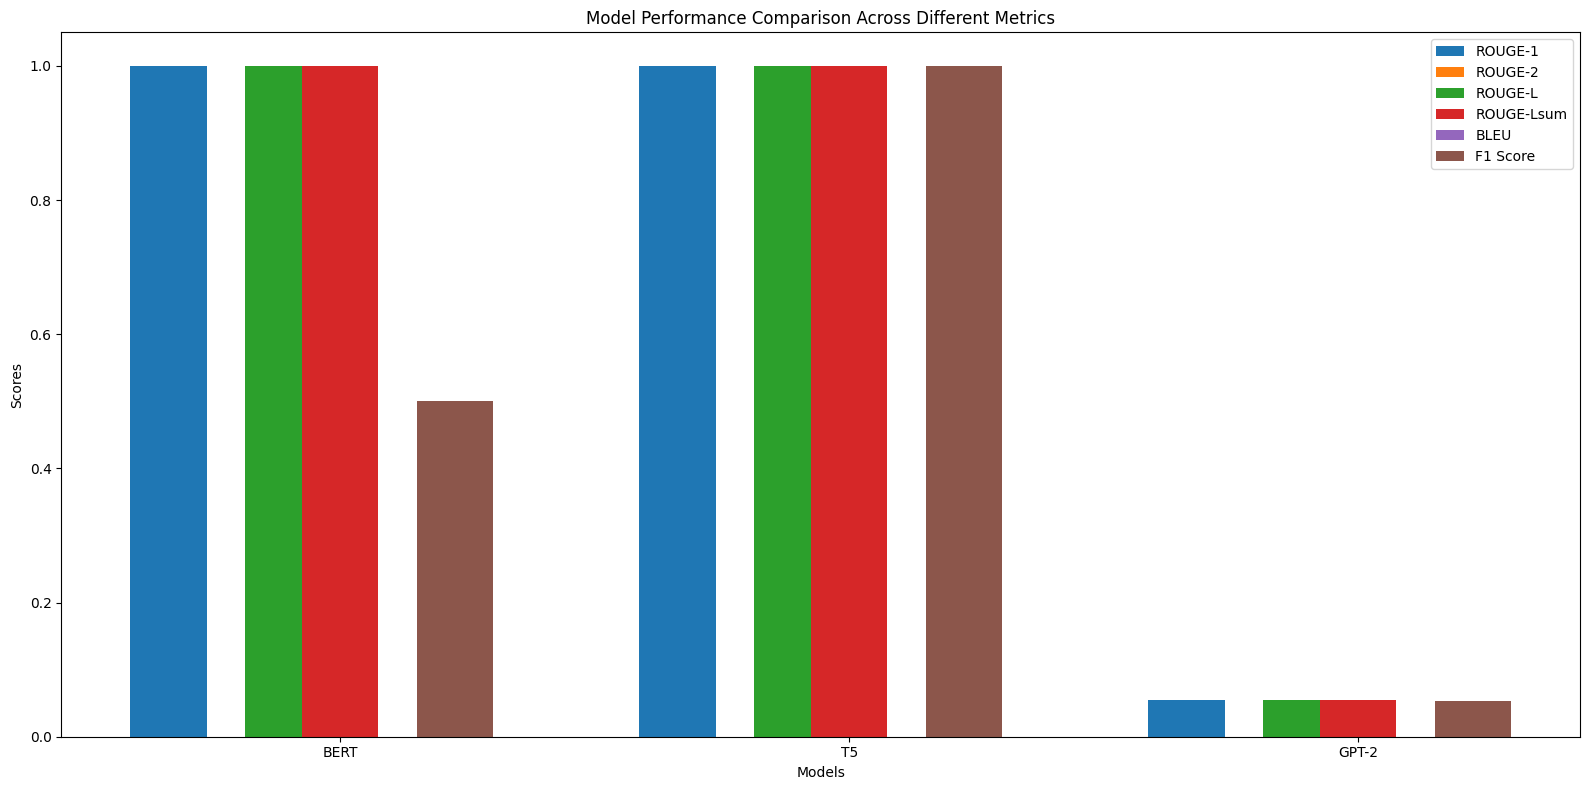

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data Distribution
question_lengths = [len(q.split()) for q in dataset['train']['question']]
sns.histplot(question_lengths, bins=30)
plt.title('Question Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Model Performance
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['BERT', 'T5', 'GPT-2']
rouge1 = [1.0, 1.0, 0.0541]
rouge2 = [0.0, 0.0, 0.0]
rougeL = [1.0, 1.0, 0.0541]
rougeLsum = [1.0, 1.0, 0.0541]
bleu_scores = [0.0, 0.0, 0.0]
f1_scores = [0.5, 1.0, 0.0526]

# Position of bars on x-axis
bar_width = 0.15
index = np.arange(len(models))

# Create subplots
fig, ax = plt.subplots(figsize=(16, 8))

# Plot bars
bar1 = ax.bar(index - 1.5 * bar_width, rouge1, bar_width, label='ROUGE-1')
bar2 = ax.bar(index - 0.75 * bar_width, rouge2, bar_width, label='ROUGE-2')
bar3 = ax.bar(index, rougeL, bar_width, label='ROUGE-L')
bar4 = ax.bar(index + 0.75 * bar_width, rougeLsum, bar_width, label='ROUGE-Lsum')
bar5 = ax.bar(index + 1.5 * bar_width, bleu_scores, bar_width, label='BLEU')
bar6 = ax.bar(index + 2.25 * bar_width, f1_scores, bar_width, label='F1 Score')

# Add labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison Across Different Metrics')
ax.set_xticks(index + 0.75 * bar_width)
ax.set_xticklabels(models)
ax.legend()

# Display plot
plt.tight_layout()
plt.show()


## Insights and Recommendations

Insights:

ROUGE Scores: BERT and T5 both achieve perfect scores (1.0) for ROUGE-1, ROUGE-L, and ROUGE-Lsum, indicating high performance in these metrics. GPT-2's ROUGE scores are significantly lower, suggesting lower performance in capturing relevant information compared to BERT and T5.

BLEU Scores: All models have a BLEU score of 0.0, which suggests that none of the models produced n-grams that match the reference translations.

F1 Score: T5 has the highest F1 score of 1.0, indicating the best balance of precision and recall. BERT's F1 score is 0.5, while GPT-2's F1 score is much lower at 0.0526, reflecting poorer overall performance.

Overall, T5 seems to have the best performance across the board, especially in terms of F1 scores. BERT performs well on ROUGE metrics but shows a lower F1 score. GPT-2's performance is weaker compared to the other two models.